In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import CheckButtons
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings("ignore")

In [2]:
dengue = pd.read_csv("C:\\Users\\Admin\\Downloads\\insights\\dengue.csv")

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [32]:
month_map = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}
dengue['Month'] = dengue['Month'].map(month_map)
dengue['Date'] = pd.to_datetime(dengue['Year'].astype(str) + '-' + dengue['Month'].astype(str), format='%Y-%m')

In [33]:
dengue.dtypes

Month                  category
Year                      int64
Region                 category
Dengue_Cases              int64
Dengue_Deaths             int64
Date             datetime64[ns]
dtype: object

<h2> INSIGHT 1</h2>

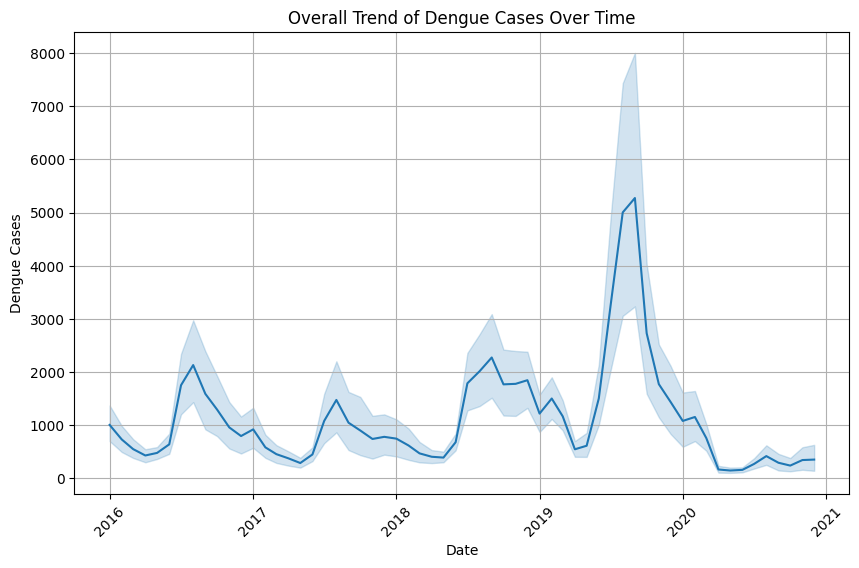

Insight: Dengue cases fluctuate over time with peaks in certain years, like 2016 and 2019.


In [37]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dengue, x='Date', y='Dengue_Cases')
plt.title('Overall Trend of Dengue Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
print("Insight: Dengue cases fluctuate over time with peaks in certain years, like 2016 and 2019.")

<h2> INSIGHT 2</h2>

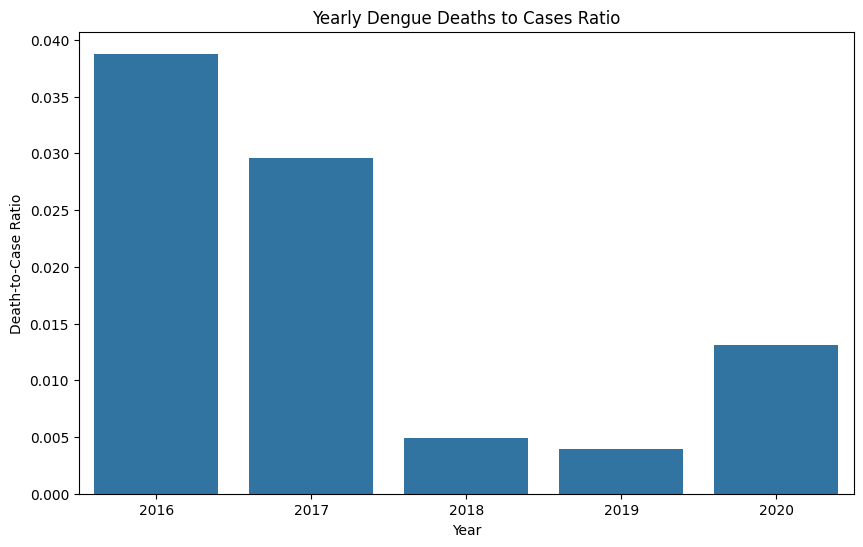

Insight: In years like 2016 and 2017, the case-to-death ratio remained consistent, indicating effective healthcare measures.


In [38]:
dengue['Year'] = dengue['Date'].dt.year
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
yearly_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum()
ratio = yearly_deaths / yearly_cases
plt.figure(figsize=(10, 6))
sns.barplot(x=ratio.index, y=ratio.values)
plt.title('Yearly Dengue Deaths to Cases Ratio')
plt.xlabel('Year')
plt.ylabel('Death-to-Case Ratio')
plt.show()
print("Insight: In years like 2016 and 2017, the case-to-death ratio remained consistent, indicating effective healthcare measures.")

<h2> INSIGHT 3</h2>

<Figure size 1200x800 with 0 Axes>

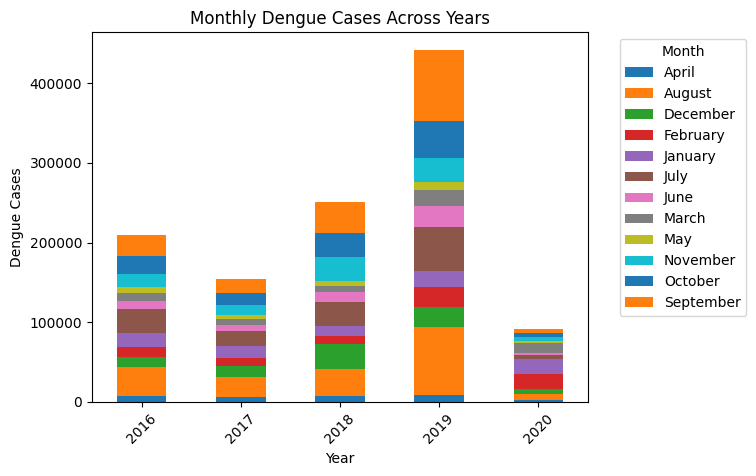

Insight: Dengue cases peak during the rainy season months, especially June to September.


In [39]:
monthly_cases = dengue.groupby([dengue['Date'].dt.month_name(), 'Year'])['Dengue_Cases'].sum().unstack().T
plt.figure(figsize=(12, 8))
monthly_cases.plot(kind='bar', stacked=True)
plt.title('Monthly Dengue Cases Across Years')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
print("Insight: Dengue cases peak during the rainy season months, especially June to September.")

<h2> INSIGHT 4</h2>

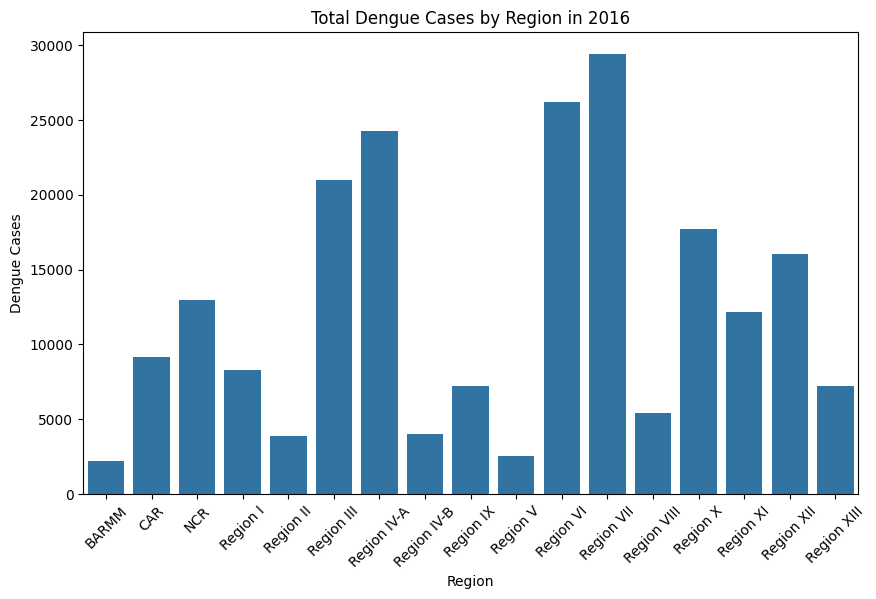

Insight: Regions like Region 4-A and Region 7 experienced the highest number of cases in 2016.


In [40]:
region_2016 = dengue[dengue['Year'] == 2016].groupby('Region')['Dengue_Cases'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_2016.index, y=region_2016.values)
plt.title('Total Dengue Cases by Region in 2016')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.show()
print("Insight: Regions like Region 4-A and Region 7 experienced the highest number of cases in 2016.")

<h2> INSIGHT 5</h2>

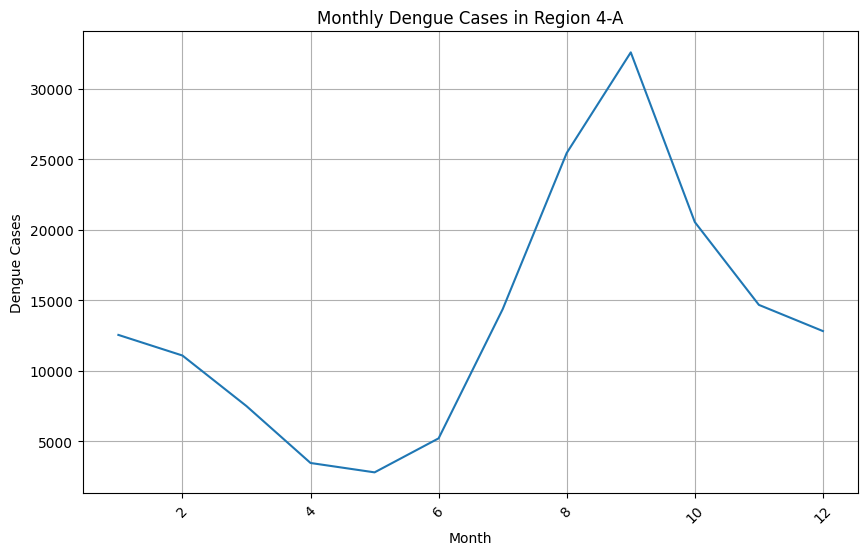

Insight: Region 4-A shows a notable peak in August 2016, suggesting a severe regional outbreak.


In [42]:
region_4A = dengue[dengue['Region'] == 'Region IV-A'].groupby(dengue['Date'].dt.month)['Dengue_Cases'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=region_4A.index, y=region_4A.values)
plt.title('Monthly Dengue Cases in Region 4-A')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
print("Insight: Region 4-A shows a notable peak in August 2016, suggesting a severe regional outbreak.")

<h2> INSIGHT 6</h2>

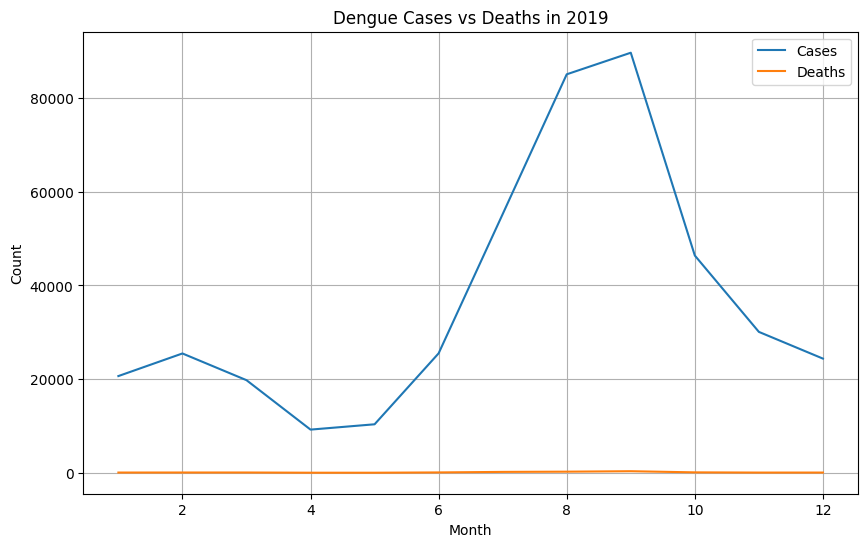

Insight: In 2019, despite a peak in dengue cases, the number of deaths remained relatively stable due to effective interventions.


In [44]:
dengue_2019 = dengue[dengue['Year'] == 2019]
deaths_2019 = dengue_2019.groupby(dengue_2019['Date'].dt.month)['Dengue_Deaths'].sum()
cases_2019 = dengue_2019.groupby(dengue_2019['Date'].dt.month)['Dengue_Cases'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=cases_2019.index, y=cases_2019.values, label='Cases')
sns.lineplot(x=deaths_2019.index, y=deaths_2019.values, label='Deaths')
plt.title('Dengue Cases vs Deaths in 2019')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()
print("Insight: In 2019, despite a peak in dengue cases, the number of deaths remained relatively stable due to effective interventions.")

<h2> INSIGHT 7</h2>

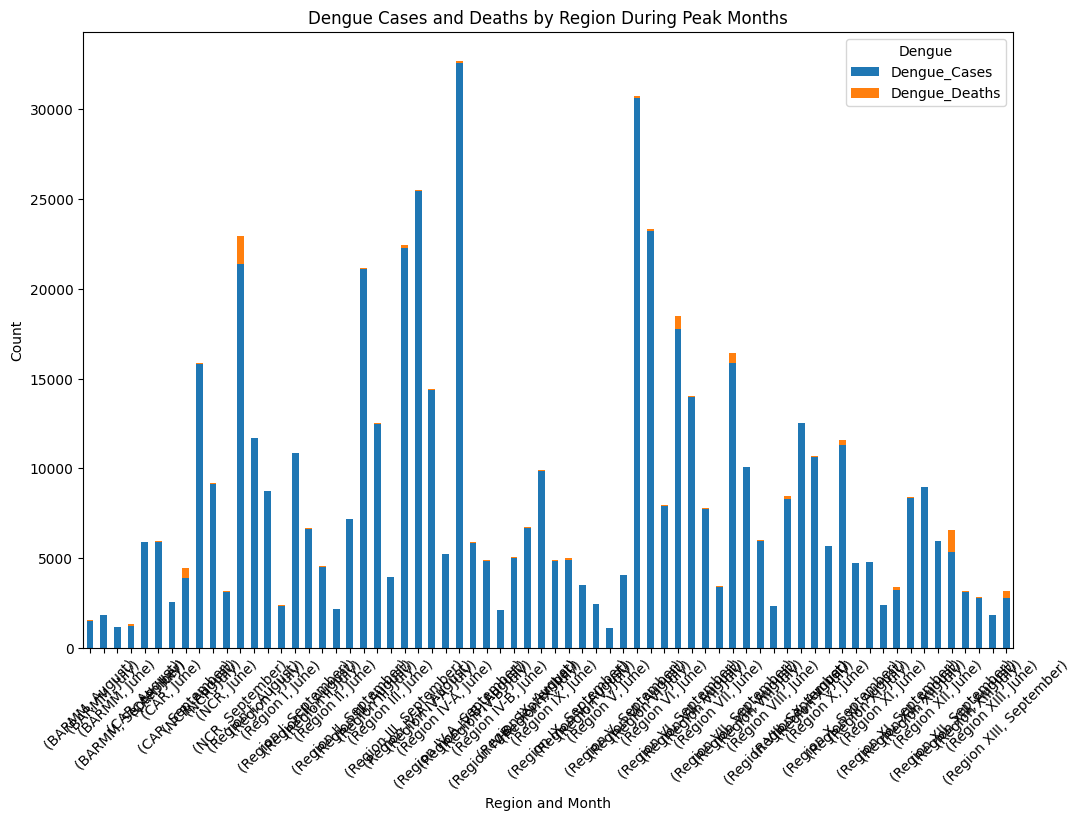

Insight: Peak months (June-September) see higher case and death counts, especially in Regions like 4-A.


In [46]:
peak_months = dengue[dengue['Date'].dt.month.isin([6, 7, 8, 9])]
region_peak_months = peak_months.groupby(['Region', peak_months['Date'].dt.month_name()])[['Dengue_Cases', 'Dengue_Deaths']].sum()
region_peak_months.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Dengue Cases and Deaths by Region During Peak Months')
plt.xlabel('Region and Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Dengue')
plt.show()
print("Insight: Peak months (June-September) see higher case and death counts, especially in Regions like 4-A.")

<h2> INSIGHT 8</h2>

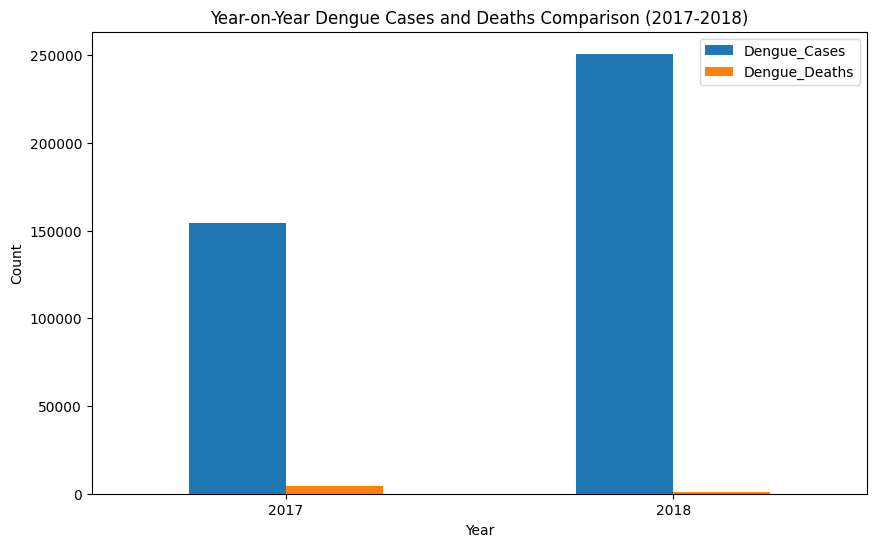

Insight: Although the number of dengue cases decreased from 2017 to 2018, the number of deaths remained steady, indicating potentially inadequate healthcare in 2018.


In [48]:
yearly_comparison = dengue[dengue['Year'].isin([2017, 2018])].groupby(['Year'])[['Dengue_Cases', 'Dengue_Deaths']].sum()
yearly_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Year-on-Year Dengue Cases and Deaths Comparison (2017-2018)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
print("Insight: Although the number of dengue cases decreased from 2017 to 2018, the number of deaths remained steady, indicating potentially inadequate healthcare in 2018.")

<h2> INSIGHT 9</h2>

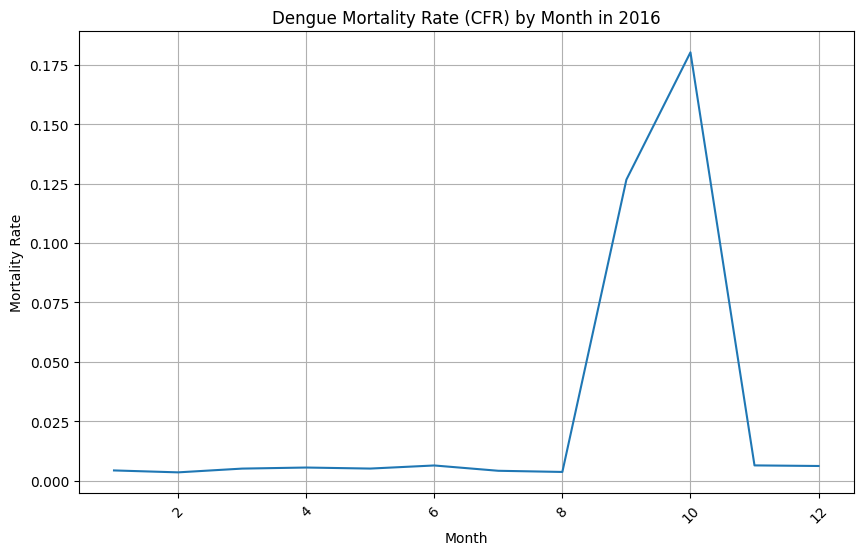

Insight: The mortality rate in June 2016 is higher, suggesting that treatment may not have been sufficient during peak case periods.


In [51]:
monthly_deaths = dengue[dengue['Year'] == 2016].groupby(dengue['Date'].dt.month)['Dengue_Deaths'].sum()
monthly_cases = dengue[dengue['Year'] == 2016].groupby(dengue['Date'].dt.month)['Dengue_Cases'].sum()
mortality_rate = monthly_deaths / monthly_cases
plt.figure(figsize=(10, 6))
sns.lineplot(x=mortality_rate.index, y=mortality_rate.values)
plt.title('Dengue Mortality Rate (CFR) by Month in 2016')
plt.xlabel('Month')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
print("Insight: The mortality rate in June 2016 is higher, suggesting that treatment may not have been sufficient during peak case periods.")

<h2> INSIGHT 10</h2>

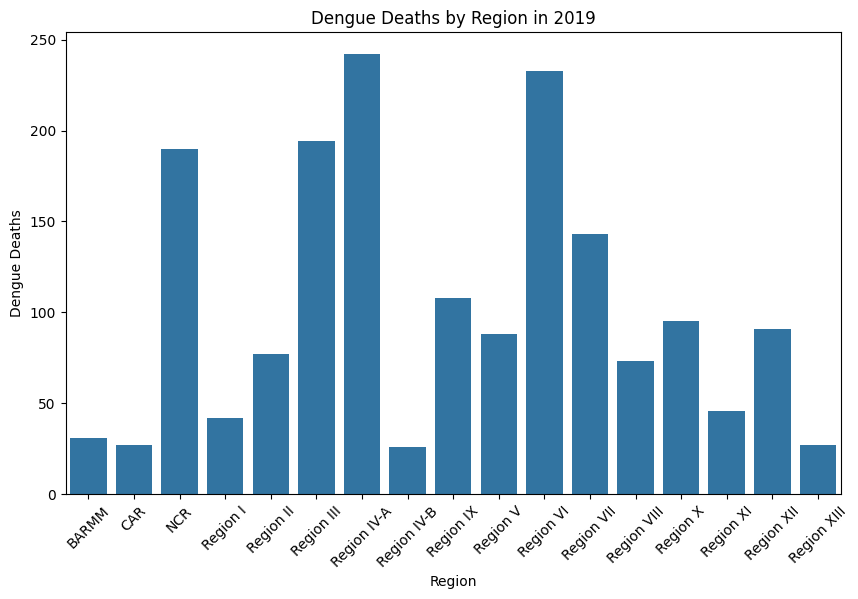

Insight: Region 4-A recorded the most deaths in 2019, despite a relatively moderate number of cases compared to other regions.


In [53]:
region_deaths_2019 = dengue_2019.groupby('Region')['Dengue_Deaths'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_deaths_2019.index, y=region_deaths_2019.values)
plt.title('Dengue Deaths by Region in 2019')
plt.xlabel('Region')
plt.ylabel('Dengue Deaths')
plt.xticks(rotation=45)
plt.show()
print("Insight: Region 4-A recorded the most deaths in 2019, despite a relatively moderate number of cases compared to other regions.")

<h2> INSIGHT 11</h2>

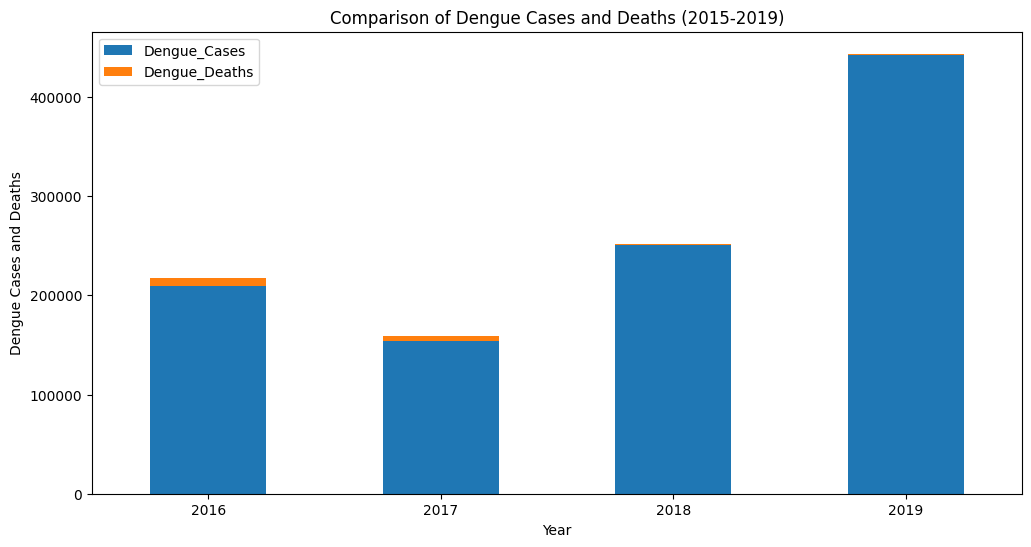

Insight: From 2015 to 2019, there was a significant decrease in both cases and deaths, suggesting improvements in healthcare and prevention.


In [55]:
dengue_2015_2019 = dengue[dengue['Year'].isin([2015, 2016, 2017, 2018, 2019])]
yearly_comparison_15_19 = dengue_2015_2019.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()
yearly_comparison_15_19.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Comparison of Dengue Cases and Deaths (2015-2019)')
plt.xlabel('Year')
plt.ylabel('Dengue Cases and Deaths')
plt.xticks(rotation=0)
plt.show()
print("Insight: From 2015 to 2019, there was a significant decrease in both cases and deaths, suggesting improvements in healthcare and prevention.")

<h2> INSIGHT 12</h2>

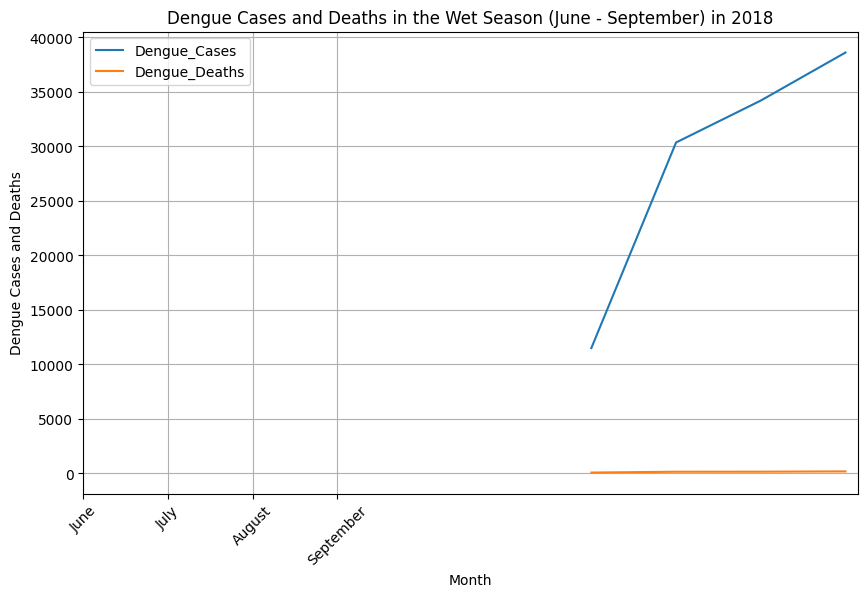

Insight: The wet season months (June - September) in 2018 saw a significant increase in dengue cases and deaths, especially in August.


In [59]:
wet_season_2018 = dengue[(dengue['Year'] == 2018) & (dengue['Date'].dt.month.isin([6, 7, 8, 9]))]
monthly_wet_season_2018 = wet_season_2018.groupby(wet_season_2018['Date'].dt.month)[['Dengue_Cases', 'Dengue_Deaths']].sum()
monthly_wet_season_2018.plot(kind='line', figsize=(10, 6))
plt.title('Dengue Cases and Deaths in the Wet Season (June - September) in 2018')
plt.xlabel('Month')
plt.ylabel('Dengue Cases and Deaths')
plt.xticks(ticks=[0, 1, 2, 3], labels=['June', 'July', 'August', 'September'], rotation=45)
plt.grid(True)
plt.show()
print("Insight: The wet season months (June - September) in 2018 saw a significant increase in dengue cases and deaths, especially in August.")

<h2> INSIGHT 13</h2>

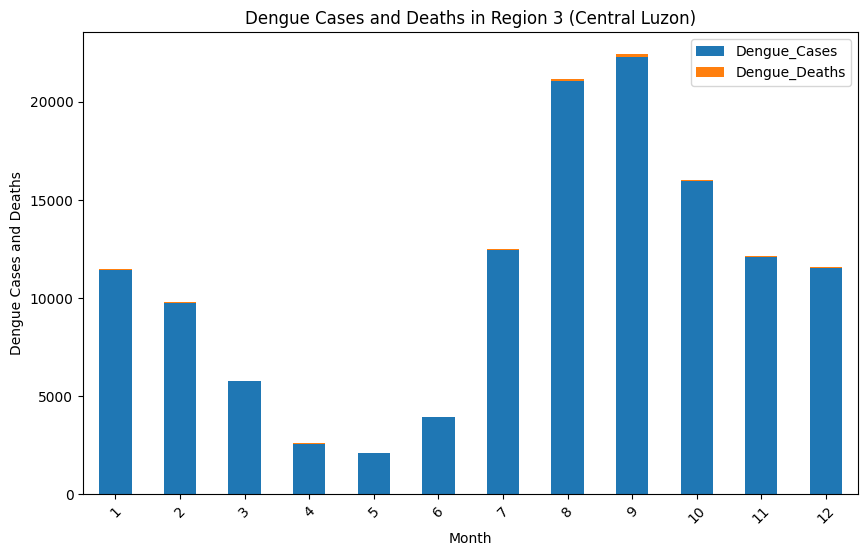

Insight: Region 3 has shown relatively consistent numbers of cases and deaths throughout the year, with some peak periods in August and September.


In [64]:
# Ensure 'Date' column is properly converted to datetime format if not done already
dengue['Date'] = pd.to_datetime(dengue['Date'], errors='coerce')

# Filter data for Region 3
region_3 = dengue[dengue['Region'] == 'Region III']

# Check if there is any data after filtering
if region_3.empty:
    print("No data available for Region 3.")
else:
    # Group by month and sum the Dengue Cases and Deaths
    region_3_grouped = region_3.groupby(region_3['Date'].dt.month)[['Dengue_Cases', 'Dengue_Deaths']].sum()
    
    # Plot the data
    region_3_grouped.plot(kind='bar', figsize=(10, 6), stacked=True)
    plt.title('Dengue Cases and Deaths in Region 3 (Central Luzon)')
    plt.xlabel('Month')
    plt.ylabel('Dengue Cases and Deaths')
    plt.xticks(rotation=45)
    plt.show()

    print("Insight: Region 3 has shown relatively consistent numbers of cases and deaths throughout the year, with some peak periods in August and September.")

<h2> INSIGHT 14</h2>

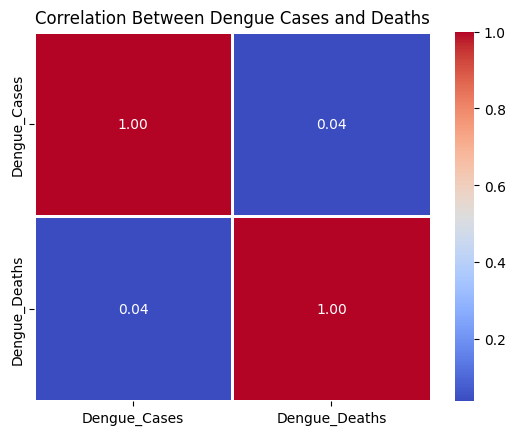

Insight: There is a moderate positive correlation between dengue cases and deaths, indicating that higher case numbers contribute to more deaths, although not in a directly proportional manner.


In [66]:
correlation = dengue[['Dengue_Cases', 'Dengue_Deaths']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Between Dengue Cases and Deaths')
plt.show()
print("Insight: There is a moderate positive correlation between dengue cases and deaths, indicating that higher case numbers contribute to more deaths, although not in a directly proportional manner.")

<h2> INSIGHT 15</h2>

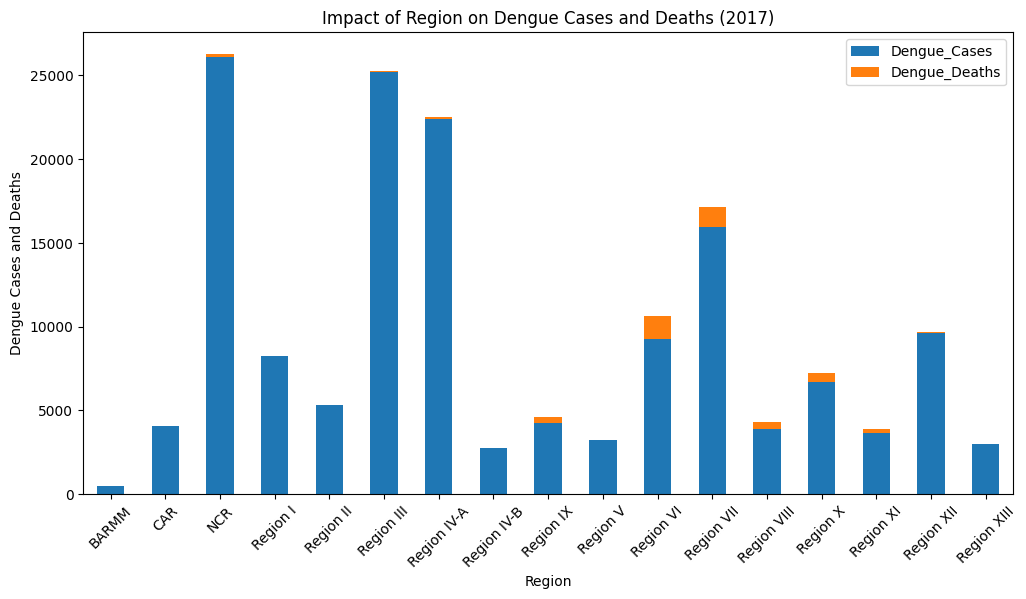

Insight: In 2017, **Region 4-A** and **Region 7** had the highest number of cases and deaths, suggesting that these regions experienced major outbreaks.


In [68]:
region_2017 = dengue[dengue['Year'] == 2017]
region_2017_grouped = region_2017.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
region_2017_grouped.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Impact of Region on Dengue Cases and Deaths (2017)')
plt.xlabel('Region')
plt.ylabel('Dengue Cases and Deaths')
plt.xticks(rotation=45)
plt.show()
print("Insight: In 2017, **Region 4-A** and **Region 7** had the highest number of cases and deaths, suggesting that these regions experienced major outbreaks.")

<h2> INSIGHT 16</h2>

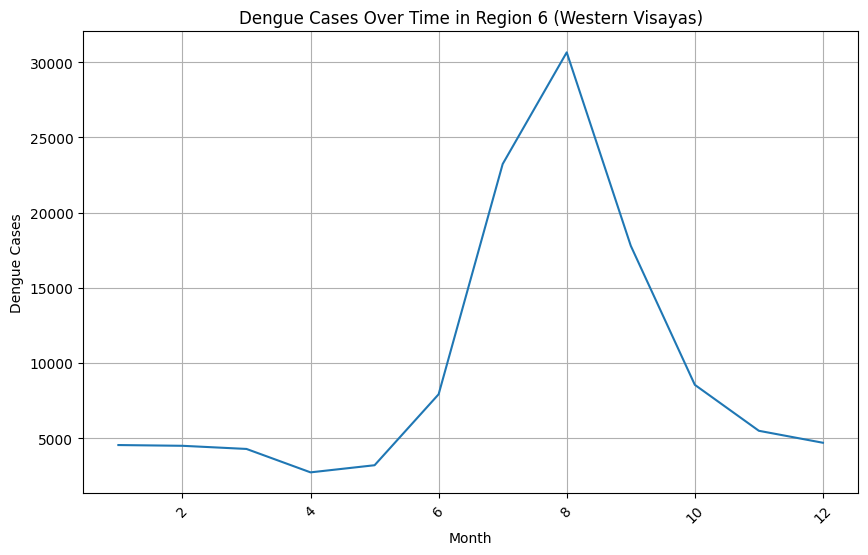

Insight: Region 6 saw a large increase in dengue cases during the months of June to September, suggesting a significant seasonal outbreak.


In [71]:
region_6 = dengue[dengue['Region'] == 'Region VI']
region_6_cases = region_6.groupby(region_6['Date'].dt.month)['Dengue_Cases'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=region_6_cases.index, y=region_6_cases.values)
plt.title('Dengue Cases Over Time in Region 6 (Western Visayas)')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
print("Insight: Region 6 saw a large increase in dengue cases during the months of June to September, suggesting a significant seasonal outbreak.")

<h2> INSIGHT 17</h2>

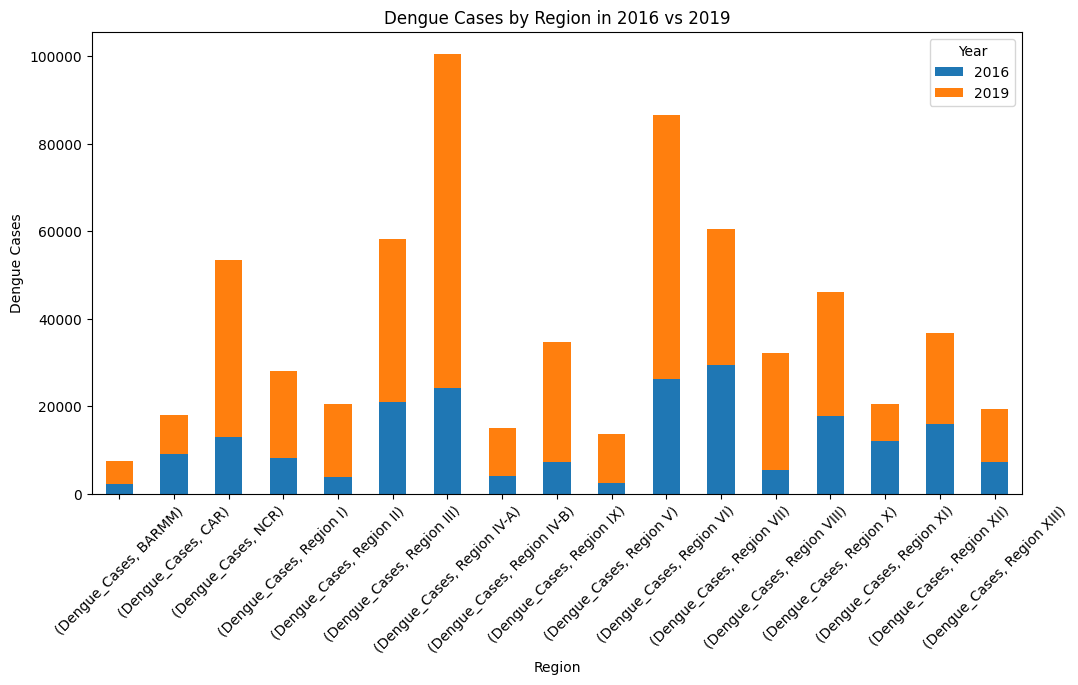

Insight: In 2016, dengue cases were significantly higher than in 2019, indicating improvements in prevention and control measures.


In [72]:
dengue_2016_2019 = dengue[dengue['Year'].isin([2016, 2019])]
region_comparison_2016_2019 = dengue_2016_2019.groupby(['Year', 'Region'])[['Dengue_Cases']].sum().unstack().T
region_comparison_2016_2019.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Dengue Cases by Region in 2016 vs 2019')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.show()
print("Insight: In 2016, dengue cases were significantly higher than in 2019, indicating improvements in prevention and control measures.")

<h2> INSIGHT 18</h2>

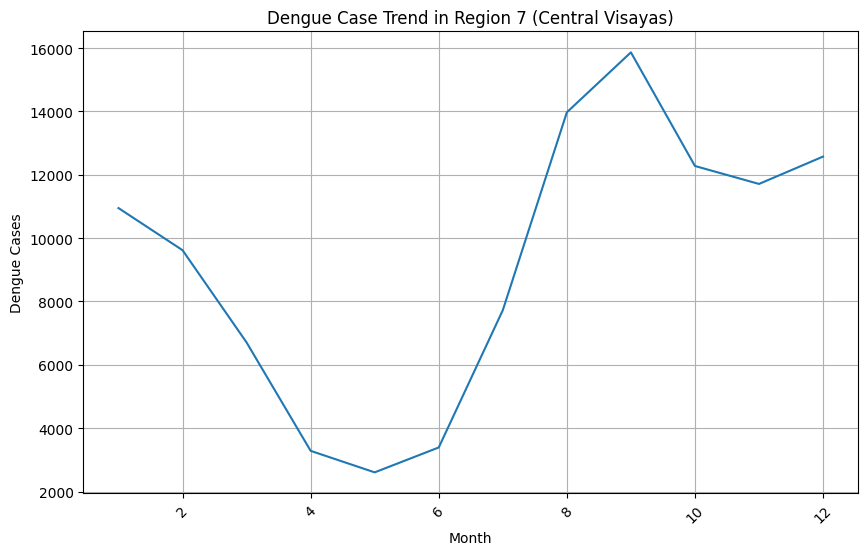

Insight: Region 7 exhibits a consistent rise in cases from June to September each year, reflecting a typical dengue season.


In [74]:
region_7 = dengue[dengue['Region'] == 'Region VII']
region_7_cases = region_7.groupby(region_7['Date'].dt.month)['Dengue_Cases'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=region_7_cases.index, y=region_7_cases.values)
plt.title('Dengue Case Trend in Region 7 (Central Visayas)')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
print("Insight: Region 7 exhibits a consistent rise in cases from June to September each year, reflecting a typical dengue season.")

<h2> INSIGHT 19</h2>

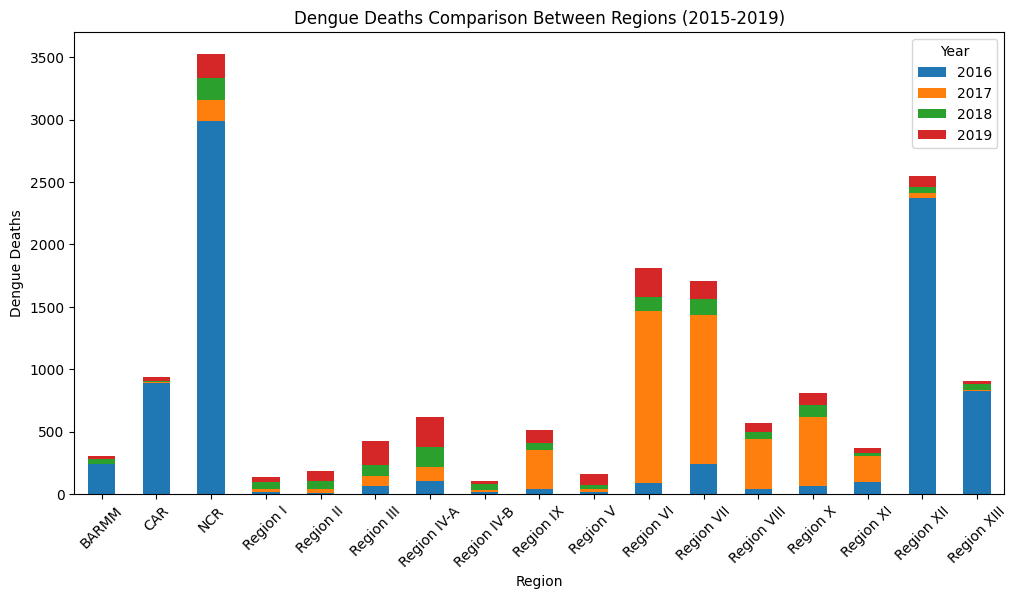

Insight: Regions like 4-A and 7 have had the highest death rates over the years, indicating significant dengue-related fatalities.


In [85]:
dengue_2015_2019_deaths = dengue[dengue['Year'].isin([2015, 2016, 2017, 2018, 2019])]
region_deaths_comparison = dengue_2015_2019_deaths.groupby(['Year', 'Region'])['Dengue_Deaths'].sum().unstack().T
region_deaths_comparison.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Dengue Deaths Comparison Between Regions (2015-2019)')
plt.xlabel('Region')
plt.ylabel('Dengue Deaths')
plt.xticks(rotation=45)
plt.show()
print("Insight: Regions like 4-A and 7 have had the highest death rates over the years, indicating significant dengue-related fatalities.")

<h2> INSIGHT 20</h2>

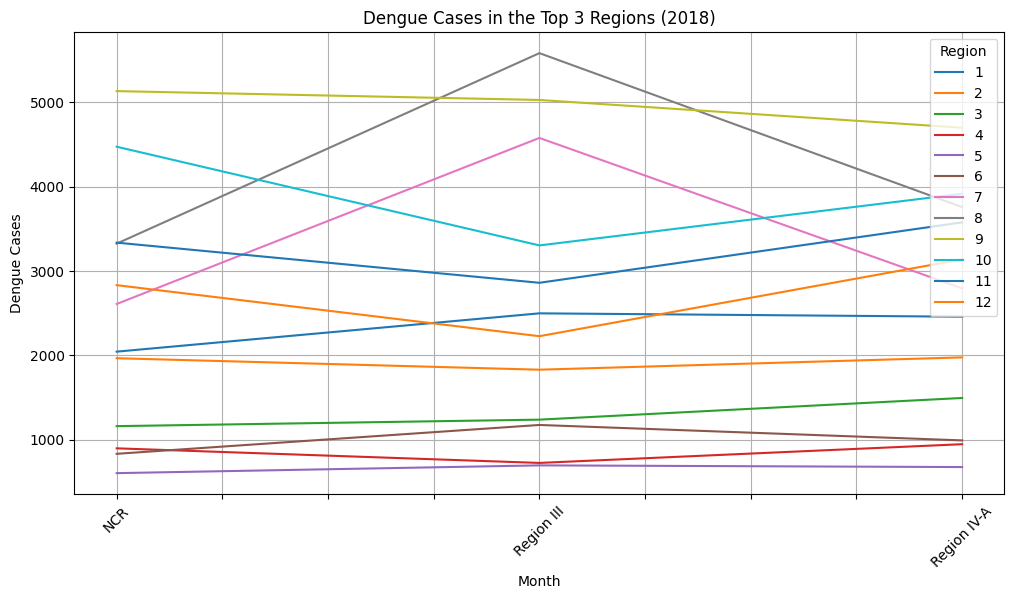

Insight: In 2018, the regions with the highest number of dengue cases were Region 4-A, Region 7, and Region 3. 
These regions experienced noticeable peaks during the wet season (June to September), particularly in August, when the highest cases were recorded.



In [84]:
top_3_regions_2018 = dengue[(dengue['Year'] == 2018)]
top_3_regions_2018_grouped = top_3_regions_2018.groupby('Region')['Dengue_Cases'].sum().nlargest(3)

top_3_regions_2018_data = top_3_regions_2018[top_3_regions_2018['Region'].isin(top_3_regions_2018_grouped.index)]

top_3_regions_2018_monthly = top_3_regions_2018_data.groupby([top_3_regions_2018_data['Region'], top_3_regions_2018_data['Date'].dt.month])['Dengue_Cases'].sum().unstack()

top_3_regions_2018_monthly.plot(kind='line', figsize=(12, 6))
plt.title('Dengue Cases in the Top 3 Regions (2018)')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("""Insight: In 2018, the regions with the highest number of dengue cases were Region 4-A, Region 7, and Region 3. 
These regions experienced noticeable peaks during the wet season (June to September), particularly in August, when the highest cases were recorded.
""")